In [1]:
from imports import *

In [2]:
file_path = 'cleaned_df.xlsx'
df = pd.read_excel(file_path)
df.head()

,Irritation,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,...,fr_aryl_methyl,fr_bicyclic,fr_ester,fr_ether,fr_halogen,fr_methoxy,fr_para_hydroxylation,fr_pyridine,fr_sulfonamd,fr_urea
0,1,-0.156202,0.917365,1.215465,0.378529,0.466241,0.209837,0.232062,0.536511,0.303403,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,1,0.133787,0.361076,0.384876,0.713980,0.694891,0.375455,0.234795,0.536740,0.303088,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,1,-2.006071,0.000000,1.841560,0.417235,0.459854,0.277571,0.130574,0.724242,0.000000,...,0.0,0.0,0.0,0.0,0.707107,0.0,0.0,0.0,0.0,0.0
3,1,-0.535903,0.607914,0.648805,0.619348,0.650299,0.287167,0.165618,0.464030,0.396366,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,1,-1.577659,0.927894,1.240141,0.480844,0.000000,0.250357,0.112937,0.724242,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [3]:
# Define features (X) and target variable (y)
X = df.drop(columns=['Irritation'])  # Assuming 'Call' is the target variable
y = df['Irritation']

In [4]:
# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% variance
X_pca = pca.fit_transform(X)  # Transform X

# Select top 10 features based on explained variance ratio
selected_features = X.columns[np.argsort(-pca.explained_variance_ratio_)[:10]]  
print("Selected Features:", selected_features)

# Filter original X with selected features
X_selected = X[selected_features]

# Combine X and y
df_pca = pd.concat([X_selected, y], axis=1)

# Export to Excel
df_pca.to_excel("selected_features_PCA.xlsx", index=False)

Selected Features: Index(['MaxAbsEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'qed',
       'SPS', 'MolWt', 'MaxPartialCharge', 'MinPartialCharge',
       'MaxAbsPartialCharge', 'MinAbsPartialCharge'],
      dtype='object')


In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (353, 108)
Shape of X_test: (89, 108)
Shape of y_train: (353,)
Shape of y_test: (89,)


In [6]:
def xgboost(X_train, y_train, X_test, y_test):
    # Instantiate the XGBoost classifier
    xgb_model = xgb.XGBClassifier(objective='binary:logistic')

    # Perform cross-validation with 5 folds and accuracy scoring
    cv_results = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')

    # Print cross-validation results
    print("Cross-validation results:")
    print(cv_results)
    print("Average Accuracy:", cv_results.mean())

    # Fit the model on the entire training dataset
    xgb_model.fit(X_train, y_train)

    # Evaluate accuracy on test data
    test_accuracy = xgb_model.score(X_test, y_test)
    train_accuracy = xgb_model.score(X_train, y_train)
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)
    return xgb_model

In [7]:
def random_forest(X_train, y_train, X_test, y_test):
    # Initialize the RandomForestClassifier
    rf = RandomForestClassifier()

    # Cross-validation
    cv_results = cross_val_score(rf, X_train, y_train, cv=5)

    # Fit the model to the training data
    rf.fit(X_train, y_train)

    # Predict on the test set
    y_pred_test = rf.predict(X_test)
    y_pred_train = rf.predict(X_train)

    # Calculate accuracy
    test_accuracy = accuracy_score(y_test, y_pred_test)
    train_accuracy = accuracy_score(y_train, y_pred_train)

    # Print the results
    print("Cross-validation results:", cv_results)
    print(f"Average Accuracy: {np.mean(cv_results)}")
    print(f"Train Accuracy: {train_accuracy}")
    print(f"Test Accuracy: {test_accuracy}")

    return rf

In [8]:
def decision_tree(X_train, y_train, X_test, y_test):
    dt = DecisionTreeClassifier()
    
    # Cross-validation
    cv_results = cross_val_score(dt, X_train, y_train, cv = 5)
    dt.fit(X_train, y_train)

    # Predict on the test set
    y_pred_test = dt.predict(X_test)
    y_pred_train = dt.predict(X_train)

    # Calculate accuracy
    test_accuracy = accuracy_score(y_test, y_pred_test)
    train_accuracy = accuracy_score(y_train, y_pred_train)

    # Print the results
    print("Cross-validation results:", cv_results)
    print(f"Average Accuracy: {np.mean(cv_results)}")
    print(f"Train Accuracy: {train_accuracy}")
    print(f"Test Accuracy: {test_accuracy}")

    return dt
    

In [9]:
def k_neigbhors(X_train, y_train, X_test, y_test):
    knn = KNeighborsClassifier()

    cv_results = cross_val_score(knn, X_train, y_train, cv=5)
    knn.fit(X_train, y_train)

    # Predict on the test set
    y_pred_test = knn.predict(X_test)
    y_pred_train = knn.predict(X_train)

    # Calculate accuracy
    test_accuracy = accuracy_score(y_test, y_pred_test)
    train_accuracy = accuracy_score(y_train, y_pred_train)

    # Print the results
    print("Cross-validation results:", cv_results)
    print(f"Average Accuracy: {np.mean(cv_results)}")
    print(f"Train Accuracy: {train_accuracy}")
    print(f"Test Accuracy: {test_accuracy}")

    return knn

In [10]:
def Support_vector_machine(X_train, y_train, X_test, y_test):
    svm= SVC()

    cv_results = cross_val_score(svm, X_train, y_train, cv=5)
    svm.fit(X_train, y_train)

    # Predict on the test set
    y_pred_test = svm.predict(X_test)
    y_pred_train = svm.predict(X_train)

    # Calculate accuracy
    test_accuracy = accuracy_score(y_test, y_pred_test)
    train_accuracy = accuracy_score(y_train, y_pred_train)

    # Print the results
    print("Cross-validation results:", cv_results)
    print(f"Average Accuracy: {np.mean(cv_results)}")
    print(f"Train Accuracy: {train_accuracy}")
    print(f"Test Accuracy: {test_accuracy}")

    return svm

In [11]:
print("XGBoost:")
xgb_model = xgboost(X_train, y_train, X_test, y_test)
print("\nRandom forest:")
rf_model = random_forest(X_train, y_train, X_test, y_test)
print("\nDecision tree:")
dt_model = decision_tree(X_train, y_train, X_test, y_test)
print("\nKNN:")
knn_model = k_neigbhors(X_train, y_train, X_test, y_test)
print("\nSVM")
svm_model = Support_vector_machine(X_train, y_train, X_test, y_test)

XGBoost:
Cross-validation results:
[0.8028169  0.81690141 0.78873239 0.85714286 0.84285714]
Average Accuracy: 0.8216901408450704
Train Accuracy: 0.9943342776203966
Test Accuracy: 0.898876404494382

Random forest:
Cross-validation results: [0.83098592 0.83098592 0.90140845 0.87142857 0.84285714]
Average Accuracy: 0.8555331991951711
Train Accuracy: 0.9943342776203966
Test Accuracy: 0.8764044943820225

Decision tree:
Cross-validation results: [0.74647887 0.8028169  0.71830986 0.72857143 0.71428571]
Average Accuracy: 0.742092555331992
Train Accuracy: 0.9943342776203966
Test Accuracy: 0.8539325842696629

KNN:
Cross-validation results: [0.74647887 0.77464789 0.73239437 0.74285714 0.81428571]
Average Accuracy: 0.7621327967806841
Train Accuracy: 0.8413597733711048
Test Accuracy: 0.8426966292134831

SVM
Cross-validation results: [0.81690141 0.77464789 0.8028169  0.8        0.84285714]
Average Accuracy: 0.8074446680080483
Train Accuracy: 0.9008498583569405
Test Accuracy: 0.8089887640449438


In [12]:
def xgboost_sort_features(model, X_train):
     # Create SHAP explainer and calculate SHAP values
    explainer = shap.Explainer(model)
    shap_values = explainer.shap_values(X_train)

    # Calculate feature importance (mean absolute SHAP values)
    feature_importance = np.abs(shap_values).mean(0)

    # Sort features by importance
    sorted_idx = np.argsort(feature_importance)[::-1]  # Sort in descending order of importance
    return sorted_idx

In [13]:
def tree_sort_features(model, X_train):       
    #  Create SHAP explainer for Random Forest
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_train)  # Shape: (samples, features, 2)

    # Compute SHAP difference (Class 1 - Class 0) and take mean absolute values
    shap_values_diff = shap_values[:, :, 1] - shap_values[:, :, 0]
    feature_importance = np.abs(shap_values_diff).mean(axis=0)  # Shape: (features,)

    # Sort features by importance
    sorted_idx = np.argsort(feature_importance)[::-1]
    return sorted_idx

In [14]:
def kernel_sort_features(model, X_train):
    # Create SHAP KernelExplainer (use a small sample for efficiency)
    explainer = shap.KernelExplainer(model.predict, X_train.sample(50))  # Sampling speeds up computation
    shap_values = explainer.shap_values(X_train)

    # Convert to NumPy array if not already
    shap_values = np.array(shap_values)  # Shape: (samples, features)

    # Compute feature importance (mean absolute SHAP values)
    feature_importance = np.abs(shap_values).mean(axis=0)  # Shape: (features,)

    # Sort features by importance
    sorted_idx = np.argsort(feature_importance)[::-1]  # Descending order
    return sorted_idx

In [15]:
def find_best_num_features(X_train, y_train, X_test, y_test, model, max_features=100):
    #sorted_idx = xgboost_sort_features(model, X_train)
    sorted_idx = tree_sort_features(model, X_train)
    #sorted_idx = kernel_sort_features(model, X_train)
    
    validation_accuracies = []
    train_accuracies = []

    for num_features in range(1, max_features + 1):
        selected_features = X_train.columns[sorted_idx[:num_features]]
        X_train_selected = X_train[selected_features]
        X_test_selected = X_test[selected_features]

        # Clone the model to prevent modifying the original instance
        model_copy = clone(model)
        model_copy.fit(X_train_selected, y_train)

        y_pred = model_copy.predict(X_test_selected)
        y_pred_train = model_copy.predict(X_train_selected)
        accuracy = accuracy_score(y_test, y_pred)
        train_accuracy = accuracy_score(y_train, y_pred_train)
        validation_accuracies.append(accuracy)
        train_accuracies.append(train_accuracy)

    plt.plot(range(1, max_features + 1), validation_accuracies, marker='o')
    #plt.plot(range(1, max_features + 1), train_accuracies, marker='o', color = "red")
    plt.xlabel("Number of Features")
    plt.ylabel("Validation Accuracy")
    plt.title("Validation Accuracy vs. Number of Features")
    plt.show()

    optimal_num_features = np.argmax(validation_accuracies) + 1
    print(f"Optimal number of features: {optimal_num_features}")

    selected_features = X_train.columns[sorted_idx[:optimal_num_features]]
    X_train_optimal = X_train[selected_features]
    X_test_optimal = X_test[selected_features]

    return X_train_optimal, X_test_optimal


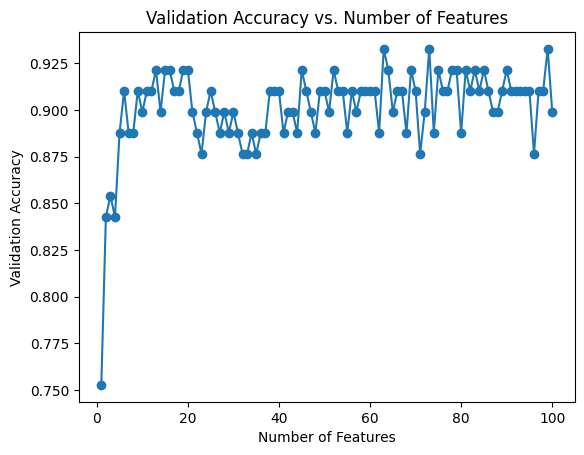

Optimal number of features: 63


,AvgIpc,HallKierAlpha,PEOE_VSA1,BertzCT,TPSA,PEOE_VSA9,SPS,NOCount,MinPartialCharge,NumHAcceptors,...,PEOE_VSA6,Ipc,VSA_EState8,EState_VSA7,EState_VSA4,VSA_EState4,EState_VSA5,NHOHCount,PEOE_VSA11,SMR_VSA4
324,0.708170,0.367876,0.270069,0.703124,0.545882,0.444212,0.771290,0.666667,0.512730,0.375000,...,0.276300,0.543279,0.492981,0.000000,0.319610,0.657429,0.636327,0.447214,0.000000,0.000000
151,0.545197,0.540587,0.240611,0.455411,0.205919,0.000000,0.000000,0.222222,0.407476,0.250000,...,0.138724,0.084351,0.854227,0.675672,0.628224,0.804105,0.527298,0.000000,0.000000,0.675598
55,0.555119,0.595855,0.240611,0.488783,0.173191,0.805130,0.471645,0.222222,0.370860,0.250000,...,0.000000,0.061710,0.552855,0.675672,0.736107,0.625148,0.000000,0.000000,0.000000,0.000000
112,0.455127,0.620035,0.000000,0.237451,0.133652,0.000000,0.000000,0.111111,0.539183,0.125000,...,0.076462,0.018851,0.233549,0.000000,0.837632,0.612924,0.377964,0.000000,0.000000,0.000000
125,0.219050,0.956284,0.713844,0.162019,0.494754,0.000000,0.204380,0.333333,0.000000,0.375000,...,0.000000,0.004943,0.233549,0.000000,0.000000,0.612924,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,0.367469,0.480138,0.000000,0.244784,0.000000,0.000000,0.281022,0.666667,0.394571,0.250000,...,0.000000,0.010123,0.233549,0.000000,0.000000,0.612924,0.000000,0.000000,0.000000,0.000000
201,0.642678,0.652850,0.940795,0.530697,0.556373,0.825363,0.656166,0.666667,0.401322,1.000000,...,0.135539,0.268278,0.546239,0.000000,0.371203,0.612924,0.562470,0.000000,0.000000,0.000000
289,0.937196,0.164076,0.515797,0.866615,0.396884,0.780270,0.745281,0.444444,0.466184,0.375000,...,0.422604,0.002744,0.242265,0.000000,0.418816,0.782908,0.000000,0.447214,0.810232,0.924164
255,0.750082,0.098446,0.000000,0.899174,0.000000,0.000000,0.504562,0.000000,0.315831,0.000000,...,0.072241,0.000000,0.233549,0.000000,0.000000,0.525770,0.000000,0.000000,0.000000,0.000000


In [16]:
# Example usage
X_train_selected, X_test_selected = find_best_num_features(X_train, y_train, X_test, y_test, rf_model)
X_train_selected

In [17]:
# Assuming selected_features is a list of feature names
selected_features = list(X_train_selected.columns)  # Convert to list if needed

# Convert to DataFrame
df_selected = pd.DataFrame(selected_features, columns=["Selected Features"])

# Export to Excel
df_selected.to_excel("selected_features_RF.xlsx", index=False)